**1. Use Case**


This project is based on the Video Game Sales dataset from Kaggle, which contains detailed information on sales performance across various platforms, genres, publishers, and regions.

The objective is to analyze and model global video game sales using Python in Google Colab.

**2. Data Loading, Cleaning and Preprocessing**

In [ ]:
from google.colab import files
import pandas as pd

# Open a file upload dialog
uploaded = files.upload()

# Show uploaded file names
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

# Load the CSV file into a pandas DataFrame (replace with your filename)
data = pd.read_csv(filename)

# Preview the first few rows
data.head()

Saving vgsales.csv to vgsales.csv
Uploaded file: vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Check the number of rows and columns in the dataset
print("\nDataset shape (rows, columns):")
print(data.shape)

# Display basic information about each column (data types, non-null values, etc.)
print("\nInformation about the dataset:")
print(data.info())

# Show summary statistics for numerical columns
print("\nSummary statistics:")
print(data.describe())

# List all column names
print("\nColumn names:")
print(data.columns.tolist())


Dataset shape (rows, columns):
(16598, 11)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Summary statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    83

In [ ]:
# Check for zero values in the entire dataset
zero_counts = (data == 0).sum()

# Show how many zero values each column has
print("Number of zero values per column:")
print(zero_counts)

# Optionally, show only columns that actually contain zeros
print("\nColumns containing zero values:")
print(zero_counts[zero_counts > 0])

Number of zero values per column:
Rank                0
Name                0
Platform            0
Year                0
Genre               0
Publisher           0
NA_Sales         4499
EU_Sales         5730
JP_Sales        10455
Other_Sales      6477
Global_Sales        0
dtype: int64

Columns containing zero values:
NA_Sales        4499
EU_Sales        5730
JP_Sales       10455
Other_Sales     6477
dtype: int64


In [ ]:
# Keep only relevant columns (for example, Global_Sales)
data = data[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]

# Confirm remaining columns
print("Remaining columns:")
print(data.columns)

Remaining columns:
Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'], dtype='object')


In [ ]:
# 🔍 1. Check for duplicate records

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If any duplicates exist, remove them
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicate records found.")


Number of duplicate rows: 1
Duplicates removed.


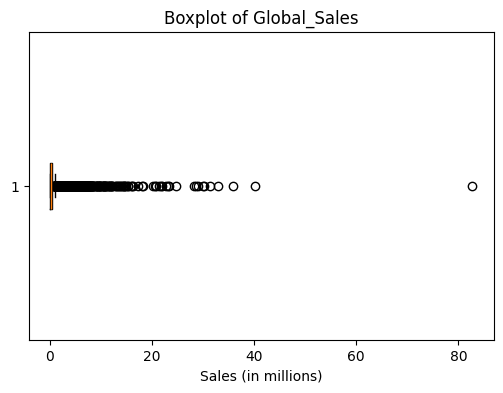

In [ ]:
# 📊 2. Detect potential outliers in Global_Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(data['Global_Sales'], vert=False)
plt.title("Boxplot of Global_Sales")
plt.xlabel("Sales (in millions)")
plt.show()


In [ ]:
Q1 = data['Global_Sales'].quantile(0.25)
Q3 = data['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

print(f"Upper limit for normal values: {upper_limit:.2f}M")

Upper limit for normal values: 1.08M


In [ ]:
top10 = data.sort_values(by='Global_Sales', ascending=False).head(10)

# Reset index to start from 1 instead of 0
top10.index = range(1, len(top10) + 1)

top10

,Name,Platform,Year,Genre,Publisher,Global_Sales
1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62
10,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


In [ ]:
# ✅ 3. Validate data consistency
# Check for negative or unrealistic values
invalid_sales = data[data['Global_Sales'] < 0]
print(f"\nRows with negative sales: {len(invalid_sales)}")


Rows with negative sales: 0


In [ ]:
# Check for unrealistic years (before 1980 or after 2025)
invalid_years = data[(data['Year'] < 1980) | (data['Year'] > 2025)]
print(f"Rows with unrealistic Year values: {len(invalid_years)}")

# Check unique values in categorical columns
print("\nUnique Genres:", data['Genre'].nunique())
print("Unique Platforms:", data['Platform'].nunique())
print("Unique Publishers:", data['Publisher'].nunique())

Rows with unrealistic Year values: 0

Unique Genres: 12
Unique Platforms: 31
Unique Publishers: 578


**3. Exploratory Data Analysis (EDA)**

**3.1 Descriptive Statistics**

=== Descriptive Statistics (Global_Sales < 1M) ===
              value
count  14516.000000
mean       0.220989
std        0.225655
min        0.010000
25%        0.050000
50%        0.130000
75%        0.310000
90%        0.570000
95%        0.730000
99%        0.930000
max        0.990000

Skewness: 1.429  |  Kurtosis: 1.367


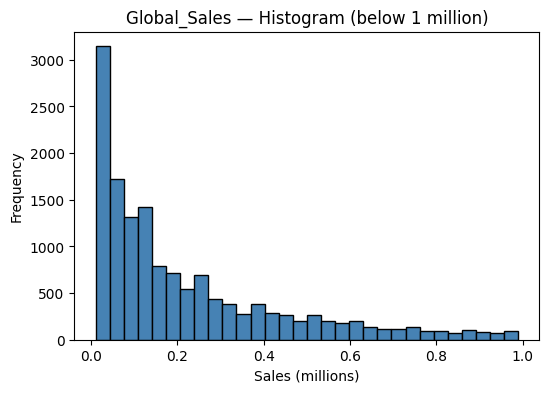

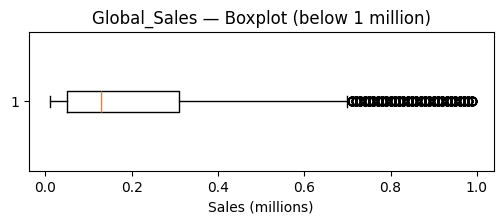

In [ ]:
# 3.1 Descriptive Statistics — Global_Sales (limited to < 1 million)

import matplotlib.pyplot as plt

# Filter data
filtered_data = data[data['Global_Sales'] < 1]

# Descriptive statistics
stats = filtered_data['Global_Sales'].describe(
    percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)
skew = filtered_data['Global_Sales'].skew()
kurt = filtered_data['Global_Sales'].kurtosis()

print("=== Descriptive Statistics (Global_Sales < 1M) ===")
print(stats.to_frame().rename(columns={'Global_Sales':'value'}))
print(f"\nSkewness: {skew:.3f}  |  Kurtosis: {kurt:.3f}")

# Histogram
plt.figure(figsize=(6,4))
plt.hist(filtered_data['Global_Sales'], bins=30, color='steelblue', edgecolor='black')
plt.title("Global_Sales — Histogram (below 1 million)")
plt.xlabel("Sales (millions)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(6,1.8))
plt.boxplot(filtered_data['Global_Sales'], vert=False)
plt.title("Global_Sales — Boxplot (below 1 million)")
plt.xlabel("Sales (millions)")
plt.show()


**3.2 Distribution of Sales Across Different Genres**


=== Sales by Genre (Global_Sales < 1M, in million units) ===


,Genre,titles,total_sales,mean_sales,median_sales,p90_sales,share_%
1,Action,2890,679.93,0.235270,0.15,0.580,21.20
2,Sports,2043,539.13,0.263891,0.18,0.620,16.81
3,Misc,1566,330.06,0.210766,0.13,0.530,10.29
4,Role-Playing,1285,290.46,0.226039,0.14,0.580,9.05
5,Shooter,1057,266.05,0.251703,0.15,0.640,8.29
6,Racing,1067,245.45,0.230037,0.14,0.590,7.65
7,Fighting,724,175.65,0.242610,0.15,0.607,5.48
8,Platform,691,175.60,0.254124,0.16,0.630,5.47
9,Simulation,774,164.49,0.212519,0.12,0.537,5.13
10,Adventure,1244,146.06,0.117412,0.05,0.300,4.55


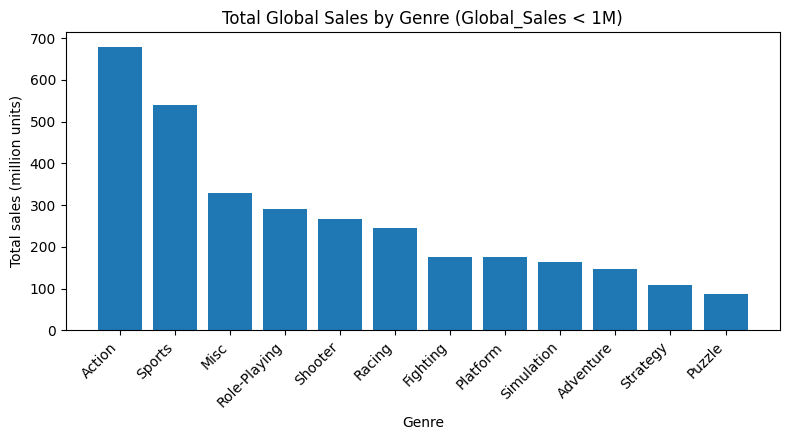

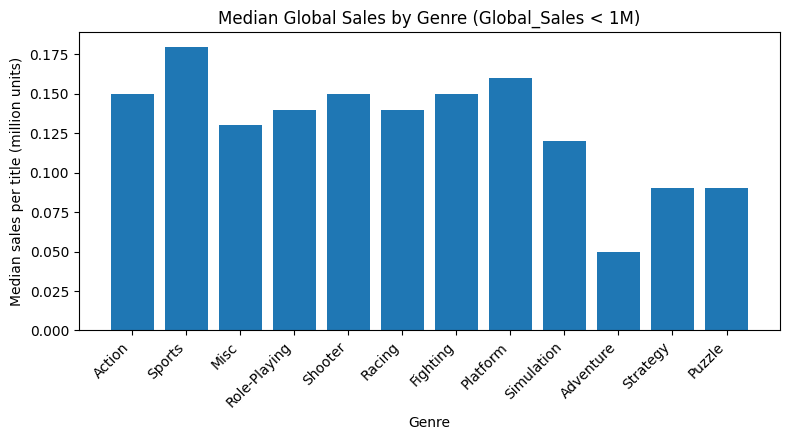

In [ ]:
# 3.2 Distribution of Sales Across Different Genres  (subset: Global_Sales < 1M)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Filter & prepare ---
df = data.copy()
df = df[(pd.to_numeric(df['Global_Sales'], errors='coerce') < 1) & (df['Genre'].notna())]

# --- Aggregate by Genre ---
agg = df.groupby('Genre')['Global_Sales'].agg(
    titles='count',
    total_sales='sum',
    mean_sales='mean',
    median_sales='median'
).reset_index()

# Optional: 90th percentile (useful for tail insight)
p90 = df.groupby('Genre')['Global_Sales'].quantile(0.90).rename('p90_sales')
agg = agg.merge(p90, on='Genre', how='left')

# Share of total sales within the <1M subset
total = agg['total_sales'].sum()
agg['share_%'] = (agg['total_sales'] / total * 100).round(2)

# Sort by total sales desc for display/plot
agg_sorted = agg.sort_values('total_sales', ascending=False).reset_index(drop=True)

print("=== Sales by Genre (Global_Sales < 1M, in million units) ===")
agg_sorted.index = np.arange(1, len(agg_sorted) + 1)
display(agg_sorted)

# --- Plot 1: Total sales by genre ---
plt.figure(figsize=(8,4.5))
plt.bar(agg_sorted['Genre'], agg_sorted['total_sales'])
plt.title("Total Global Sales by Genre (Global_Sales < 1M)")
plt.xlabel("Genre")
plt.ylabel("Total sales (million units)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Plot 2: Median sales by genre ---
plt.figure(figsize=(8,4.5))
plt.bar(agg_sorted['Genre'], agg_sorted['median_sales'])
plt.title("Median Global Sales by Genre (Global_Sales < 1M)")
plt.xlabel("Genre")
plt.ylabel("Median sales per title (million units)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.3   Comparision of Total Sales Between Gaming Platforms**

=== Sales by Platform (Global_Sales < 1M, in million units) ===


,Platform,titles,total_sales,mean_sales,median_sales,share_%
1,PS2,1836,466.23,0.253938,0.180,14.53
2,DS,2019,343.96,0.170362,0.100,10.72
3,PS3,1082,318.58,0.294436,0.200,9.93
4,X360,1029,297.57,0.289184,0.200,9.28
5,Wii,1162,285.91,0.246050,0.160,8.91
6,PS,990,267.00,0.269697,0.180,8.32
7,PSP,1156,182.09,0.157517,0.080,5.68
8,XB,770,164.66,0.213844,0.130,5.13
9,GBA,752,158.56,0.210851,0.140,4.94
10,GC,510,104.56,0.205020,0.130,3.26


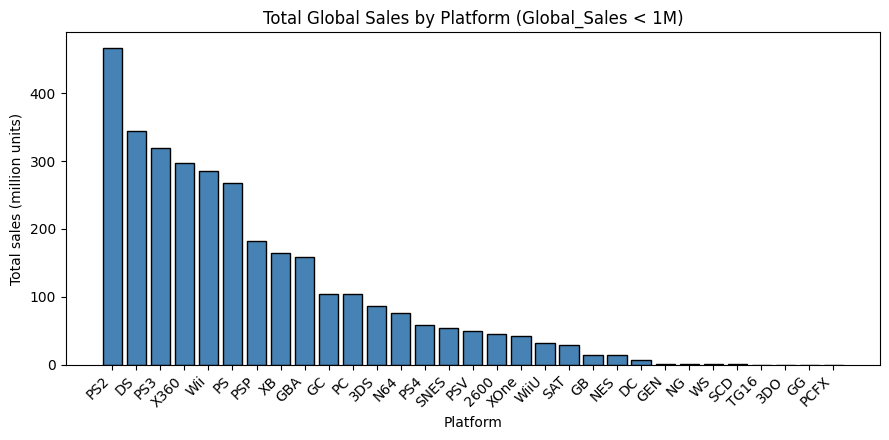

In [ ]:
# 3.3 Comparison of Total Sales Between Gaming Platforms (Global_Sales < 1M)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Filter ---
df = data.copy()
df = df[(pd.to_numeric(df['Global_Sales'], errors='coerce') < 1) & (df['Platform'].notna())]

# --- Aggregate by Platform ---
agg = df.groupby('Platform')['Global_Sales'].agg(
    titles='count',
    total_sales='sum',
    mean_sales='mean',
    median_sales='median'
).reset_index()

# Add share
agg['share_%'] = (agg['total_sales'] / agg['total_sales'].sum() * 100).round(2)

# Sort descending by total_sales
agg_sorted = agg.sort_values('total_sales', ascending=False).reset_index(drop=True)
agg_sorted.index = np.arange(1, len(agg_sorted) + 1)

print("=== Sales by Platform (Global_Sales < 1M, in million units) ===")
display(agg_sorted)

# --- Plot: Total sales by platform ---
plt.figure(figsize=(9,4.5))
plt.bar(agg_sorted['Platform'], agg_sorted['total_sales'], color='steelblue', edgecolor='black')
plt.title("Total Global Sales by Platform (Global_Sales < 1M)")
plt.xlabel("Platform")
plt.ylabel("Total sales (million units)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
display(agg_sorted.iloc[14:31])

,Platform,titles,total_sales,mean_sales,median_sales,share_%
15,SNES,191,54.66,0.286178,0.260,1.70
16,PSV,405,49.77,0.122889,0.060,1.55
17,2600,107,45.61,0.426262,0.390,1.42
18,XOne,170,42.06,0.247412,0.155,1.31
19,WiiU,124,31.46,0.253710,0.150,0.98
20,SAT,170,29.43,0.173118,0.120,0.92
21,GB,43,14.43,0.335581,0.280,0.45
22,NES,24,14.23,0.592917,0.630,0.44
23,DC,46,7.13,0.155000,0.115,0.22
24,GEN,16,1.57,0.098125,0.075,0.05


**3.4 Analysis of Sales Performance by Publisher**

=== Top 10 Publishers by Total Sales (Global_Sales < 1M, in million units) ===


,Publisher,titles,total_sales,mean_sales,median_sales,p90_sales,share_%
1,Electronic Arts,1009,372.28,0.368959,0.32,0.770,11.64
2,Activision,814,238.53,0.293034,0.23,0.640,7.46
3,Ubisoft,804,203.85,0.253545,0.17,0.620,6.37
4,THQ,627,186.06,0.296746,0.22,0.630,5.82
5,Sony Computer Entertainment,534,171.98,0.322060,0.24,0.767,5.38
6,Namco Bandai Games,879,161.73,0.183993,0.11,0.452,5.06
7,Konami Digital Entertainment,770,154.37,0.200481,0.13,0.470,4.83
8,Nintendo,364,132.30,0.363462,0.30,0.740,4.14
9,Sega,565,131.82,0.233310,0.15,0.546,4.12
10,Take-Two Interactive,322,92.69,0.287857,0.20,0.669,2.90


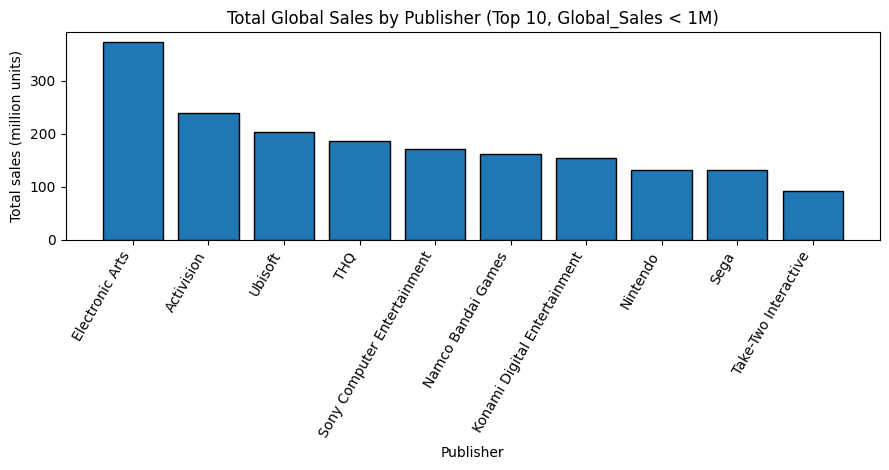

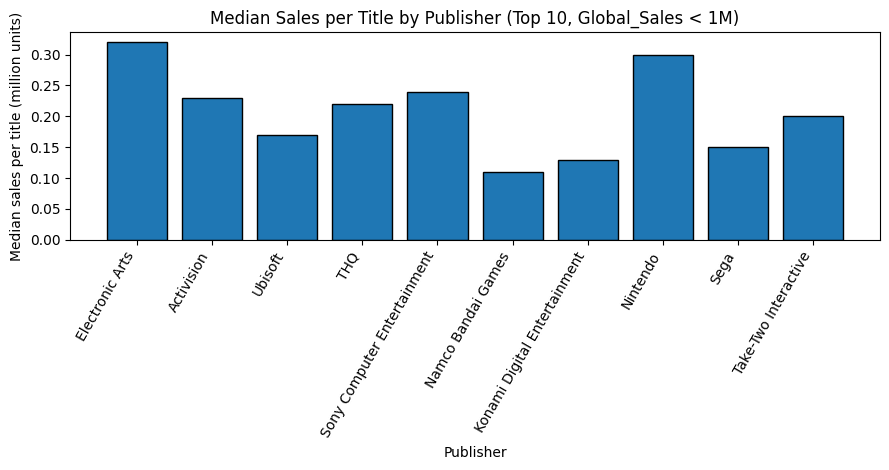

In [ ]:
# 3.4 Analysis of Sales Performance by Publisher (Global_Sales < 1M)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("vgsales.csv")

# --- Filter & prepare ---
df = data.copy()
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')
df = df[(df['Global_Sales'] < 1) & (df['Publisher'].notna())]

# --- Aggregate by Publisher ---
agg = df.groupby('Publisher', as_index=False)['Global_Sales'].agg(
    titles='count',
    total_sales='sum',
    mean_sales='mean',
    median_sales='median'
)

# 90th percentile for additional insight
p90 = df.groupby('Publisher')['Global_Sales'].quantile(0.90).rename('p90_sales')
agg = agg.merge(p90, on='Publisher', how='left')

# Share of total sales (within <1M subset)
total = agg['total_sales'].sum()
agg['share_%'] = (agg['total_sales'] / total * 100).round(2)

# --- Sort & Top 10 ---
top_n = 10
agg_sorted = agg.sort_values('total_sales', ascending=False).head(top_n).reset_index(drop=True)
agg_sorted.index = np.arange(1, len(agg_sorted) + 1)

print(f"=== Top {len(agg_sorted)} Publishers by Total Sales (Global_Sales < 1M, in million units) ===")
display(agg_sorted)

# --- Plot 1: Total sales by publisher ---
plt.figure(figsize=(9,4.8))
plt.bar(agg_sorted['Publisher'], agg_sorted['total_sales'], edgecolor='black')
plt.title(f"Total Global Sales by Publisher (Top {top_n}, Global_Sales < 1M)")
plt.xlabel("Publisher")
plt.ylabel("Total sales (million units)")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# --- Plot 2: Median sales by publisher ---
plt.figure(figsize=(9,4.8))
plt.bar(agg_sorted['Publisher'], agg_sorted['median_sales'], edgecolor='black')
plt.title(f"Median Sales per Title by Publisher (Top {top_n}, Global_Sales < 1M)")
plt.xlabel("Publisher")
plt.ylabel("Median sales per title (million units)")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


**3.5 Examination of Global Sales Trends Over Time**

=== Global Sales Trends Over Time (Global_Sales < 1M) ===


,Year,titles,total_sales,mean_sales
0,1980.0,5,2.11,0.422000
1,1981.0,35,15.48,0.442286
2,1982.0,29,13.34,0.460000
3,1983.0,10,4.52,0.452000
4,1984.0,3,1.78,0.593333


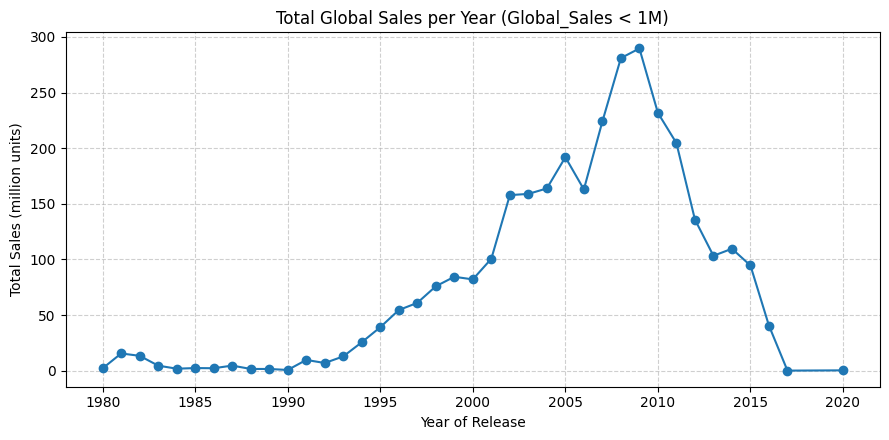

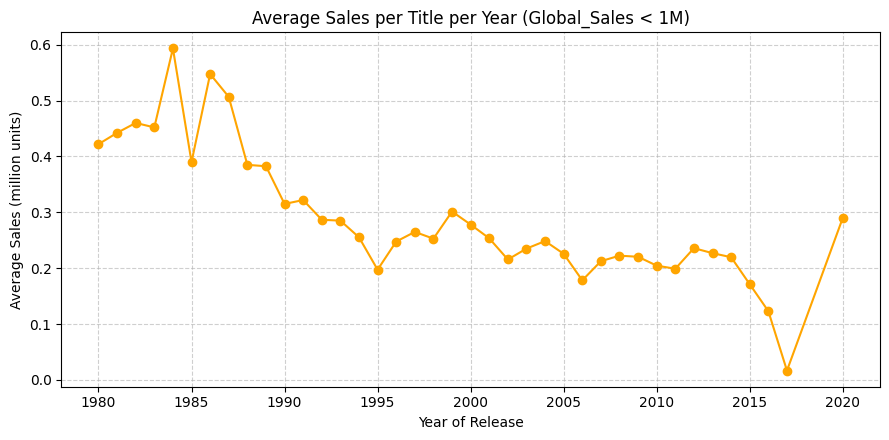

In [ ]:
# 3.5 Examination of Global Sales Trends Over Time (Global_Sales < 1M)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("vgsales.csv")

# --- Filter & prepare ---
df = data.copy()
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df = df[(df['Global_Sales'] < 1) & (df['Year'].notna())]

# --- Aggregate by Year ---
agg = df.groupby('Year', as_index=False)['Global_Sales'].agg(
    titles='count',
    total_sales='sum',
    mean_sales='mean'
)

print("=== Global Sales Trends Over Time (Global_Sales < 1M) ===")
display(agg.head())

# --- Plot 1: Total sales per year ---
plt.figure(figsize=(9,4.5))
plt.plot(agg['Year'], agg['total_sales'], marker='o')
plt.title("Total Global Sales per Year (Global_Sales < 1M)")
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (million units)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Average sales per title per year ---
plt.figure(figsize=(9,4.5))
plt.plot(agg['Year'], agg['mean_sales'], color='orange', marker='o')
plt.title("Average Sales per Title per Year (Global_Sales < 1M)")
plt.xlabel("Year of Release")
plt.ylabel("Average Sales (million units)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.7 Identification of the top 10 best-selling games**

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
                                 Name  Global_Sales
11007                      Wii Sports         82.74
3712               Grand Theft Auto V         55.92
9327     

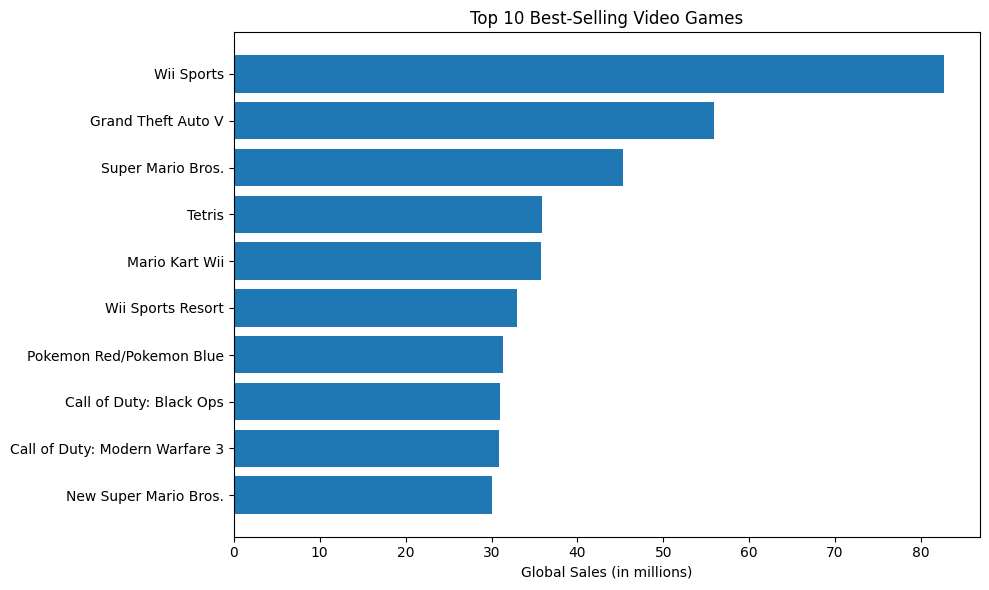

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vgsales.csv')

# Preview the first few rows
print(df.head())

# Group by game name and sum up the global sales
top_games = (
    df.groupby('Name', as_index=False)['Global_Sales']
      .sum()
      .sort_values(by='Global_Sales', ascending=False)
      .head(10)
)

# Display the top 10 best-selling games
print(top_games)

# Plot the results
plt.figure(figsize=(10,6))
plt.barh(top_games['Name'][::-1], top_games['Global_Sales'][::-1])
plt.xlabel('Global Sales (in millions)')
plt.title('Top 10 Best-Selling Video Games')
plt.tight_layout()
plt.show()


**3.7 Correlation Analysis Between Numerical Variables**

                  Year  Platform     Genre  Publisher  Global_Sales
Year          1.000000  0.167823 -0.124994   0.029976     -0.074735
Platform      0.167823  1.000000  0.029061  -0.017925      0.028213
Genre        -0.124994  0.029061  1.000000  -0.052094      0.021671
Publisher     0.029976 -0.017925 -0.052094   1.000000      0.015869
Global_Sales -0.074735  0.028213  0.021671   0.015869      1.000000


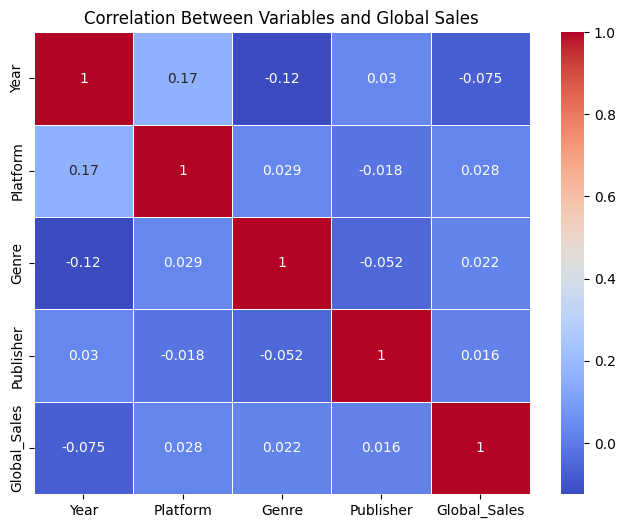

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset (if already loaded, skip this line)
# data = pd.read_csv('vgsales.csv')

# Encode categorical variables
encoder = LabelEncoder()
encoded_data = data.copy()
for col in ['Platform', 'Genre', 'Publisher']:
    encoded_data[col] = encoder.fit_transform(data[col].astype(str))

# Select numeric columns for correlation
numeric_cols = ['Year', 'Platform', 'Genre', 'Publisher', 'Global_Sales']

# Compute correlation matrix
corr_matrix = encoded_data[numeric_cols].corr()

# Print correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Variables and Global Sales')
plt.show()



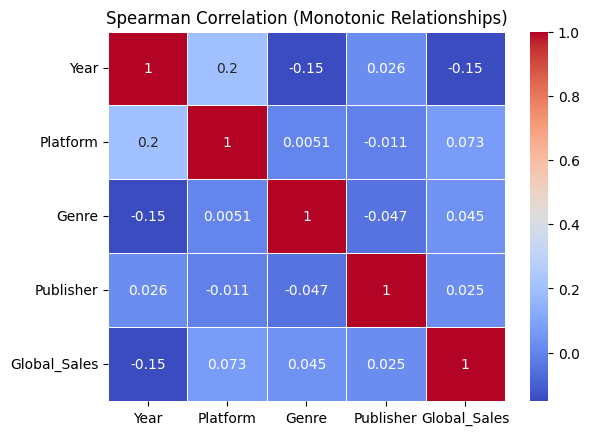

In [ ]:
corr_spearman = encoded_data[numeric_cols].corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation (Monotonic Relationships)')
plt.show()

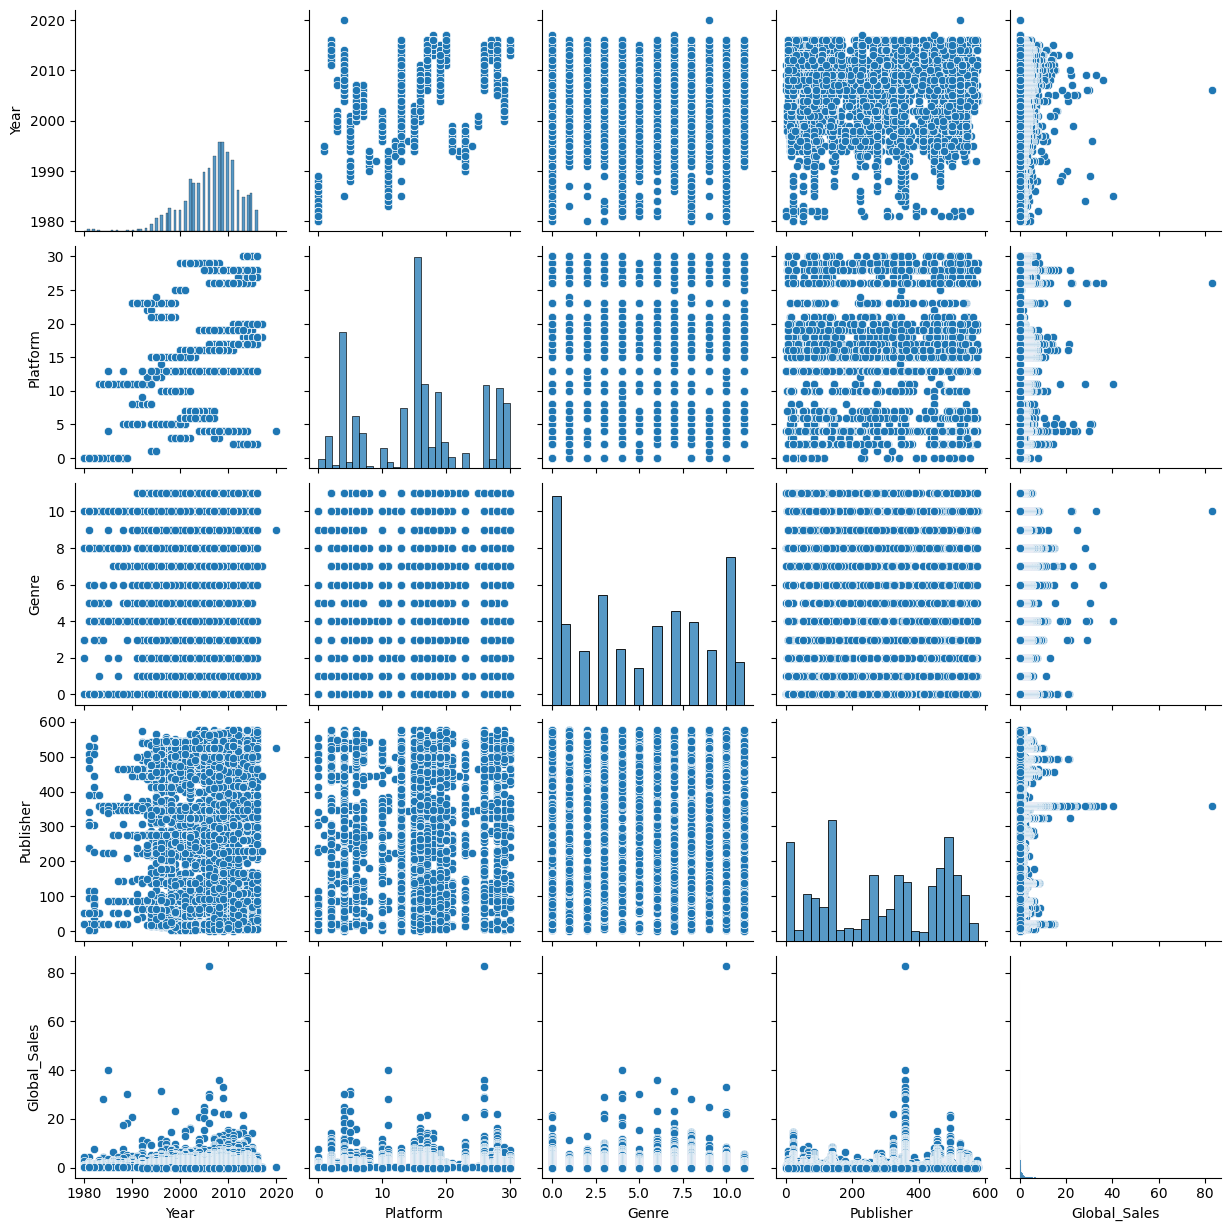

In [ ]:
sns.pairplot(encoded_data[numeric_cols])
plt.show()

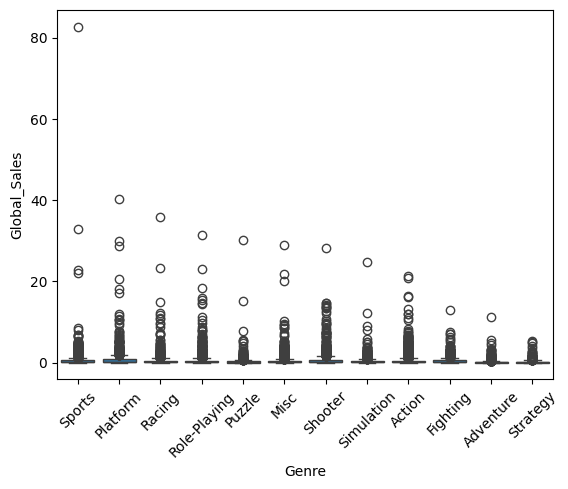

In [ ]:
sns.boxplot(x='Genre', y='Global_Sales', data=data)
plt.xticks(rotation=45)
plt.show()

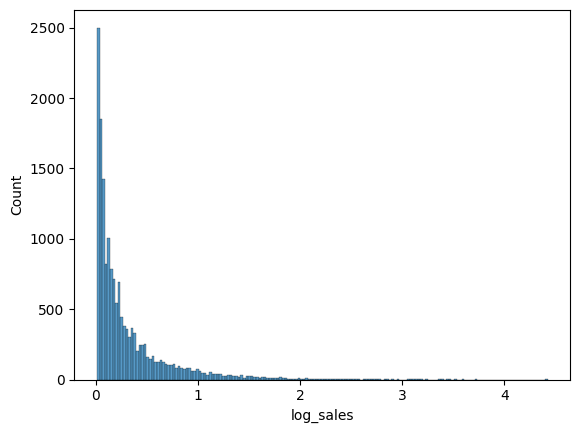

In [ ]:
import numpy as np
data['log_sales'] = np.log1p(data['Global_Sales'])
sns.histplot(data['log_sales'])
plt.show()